#  Decision trees for classification

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

### 1) Reading of the processed dataset

In [12]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X, y = load_iris(return_X_y = True, as_frame = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 71)

X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
119,6.0,2.2,5.0,1.5
5,5.4,3.9,1.7,0.4
28,5.2,3.4,1.4,0.2
83,6.0,2.7,5.1,1.6
6,4.6,3.4,1.4,0.3


<Axes: >

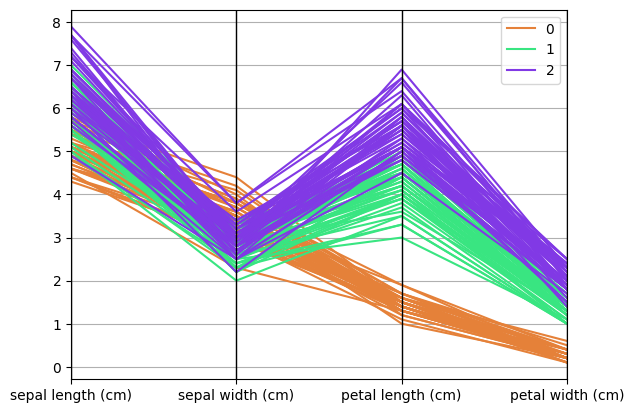

In [13]:
# Relationship of the variables with the target
df = X
df["Outcome"] = y

pd.plotting.parallel_coordinates(df, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))

### 2) Model initialisation and training

In [14]:
# Create and train the decision tree model

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=71)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=71)

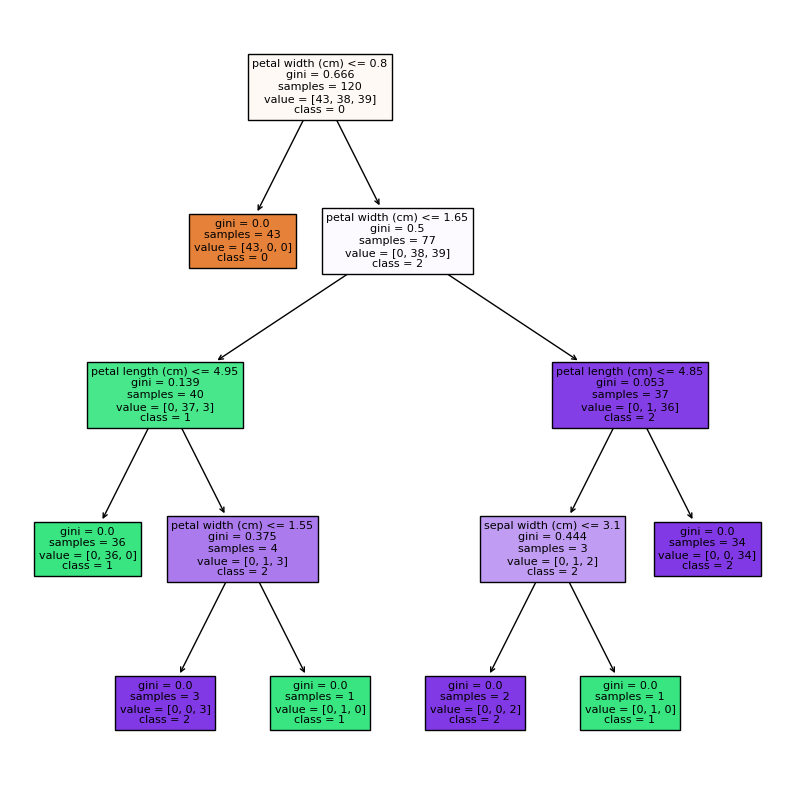

In [15]:
# Visualise the decision tree
from sklearn import tree

fig = plt.figure(figsize=(10,10))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1", "2"], filled = True)

plt.show()

### 3) Model prediction

In [16]:
# Making predictions on the test set
y_pred = model.predict(X_test)
y_pred

array([2, 0, 1, 2, 1, 1, 0, 2, 2, 2, 2, 0, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0,
       1, 1, 1, 2, 2, 1, 2, 2])

In [17]:
# model accuracy in the test set
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9333333333333333

In [18]:
# save trained model
from pickle import dump

dump(model, open("/workspaces/ML-Decision-Tree-PilarZarco/models/decision_tree_classifier_default_71.sav", "wb"))